# Installing and using packages in Julia

To add a package, use Pkg.add("Package Name")

After a package is added to the project, it can be loaded in Julia.

These are some useful packages for solving differential equations and comparing the performances of solvers.

The purpose of DifferentialEquations is to supply efficient Julia implementations of solvers for various differential equations.

StaticArrays provides a framework for implementing statically sized arrays in Julia, using the abstract type StaticArray{Size,T,N} <: AbstractArray{T,N}. Subtypes of StaticArray will provide fast implementations of a common array and linear algebra operations.

ParameterizedFunctions provides user-facing macros which make a ParameterizedFunction easy to define, and automatically include optimizations like explicit Jacobian functions and explicit inverse Jacobian functions for the differential equation solvers to take advantage of. 

BenchmarkTools was created to facilitate the following tasks:

1. Organize collections of benchmarks into manageable benchmark suites
2. Configure, save, and reload benchmark parameters for convenience, accuracy, and consistency
3. Execute benchmarks in a manner that yields reasonable and consistent performance predictions
4. Analyze and compare results to determine whether a code change caused regressions or improvements

In [14]:
using Pkg

In [18]:
Pkg.add("DifferentialEquations")
Pkg.add("StaticArrays")
Pkg.add("ParameterizedFunctions")

   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\tugce\Project.toml`
  No Changes to `C:\Users\tugce\Manifest.toml`


In [20]:
using DifferentialEquations
using BenchmarkTools
using StaticArrays
using ParameterizedFunctions

In [22]:
using Plots; gr()

Plots.GRBackend()

# Describing Hénon-Heiles Equation


In [24]:
function henonheilis(du,u,p,t)     
        du[1] = u[3]
        du[2] = u[4]
        du[3] = -u[1] - 2*u[1]*u[2]
        du[4] = -u[2] - u[1]^2+u[2]^2
end 

henonheilis (generic function with 2 methods)

In [26]:
u0 = [0.2;0.0;0.4;0.0];
tspan = (0.0,500.0);
prob = ODEProblem(henonheilis,u0,tspan)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 500.0)
u0: 4-element Vector{Float64}:
 0.2
 0.0
 0.4
 0.0

Solving with different method to observe effitiency 

1- Tsit5() (For most non-stiff problems, Tsit5 is recommended to solve.)

2- Stiff (Recomended to use for stiff problems)

3- Default (DifferentialEquations.jl makes a guess at a good algorithm for your problem, given the properties that you ask for.)

and observe solution effiency with saving every output


### Solving Hénon-Heiles Equation with Algorithm of Tsit5() Solver


In [81]:
@benchmark sol=solve(prob,Tsit5())

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  182.000 μs …  40.443 ms  ┊ GC (min … max): 0.00% … 99.14%
 Time  (median):     288.400 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   331.925 μs ± 845.621 μs  ┊ GC (mean ± σ):  9.93% ±  4.05%

   ▅▁        █▅                                                  
  ▅██▃▂▂▂▂▂▅▅██▇▅▃▃▂▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  182 μs           Histogram: frequency by time          741 μs <

 Memory estimate: 248.78 KiB, allocs estimate: 740.

In [82]:
@benchmark solve(prob,Tsit5(),save_everystep=false)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  129.700 μs …  1.235 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     138.300 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   150.577 μs ± 51.866 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

  █▇▅▅▆▅▅▃▂▂▁▂▄▂▂▂▂▁▁▁                                         ▂
  ██████████████████████████████▇██▇▇▇▇█▇▇▆▆▆▆▆▆▆▆▅▅▄▆▄▃▅▃▁▃▃▄ █
  130 μs        Histogram: log(frequency) by time       304 μs <

 Memory estimate: 3.83 KiB, allocs estimate: 22.

In [ ]:
As we can see above saving everytstep make the process slower and it use much more memory to 

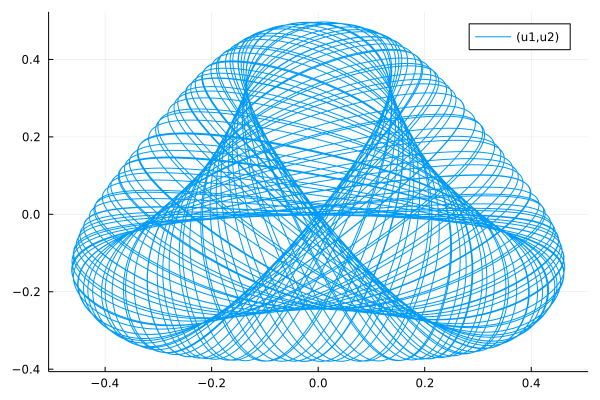

In [83]:
plot(sol,vars=(1,2))

### Solving Hénon-Heiles Equation with Algorithm of :stiff Solver


In [96]:
sol_stiff = solve(prob,alg_hints=[:stiff])
@benchmark sol = solve(prob,alg_hints=[:stiff])

BenchmarkTools.Trial: 242 samples with 1 evaluation.
 Range (min … max):  13.845 ms … 43.943 ms  ┊ GC (min … max): 0.00% … 45.67%
 Time  (median):     18.041 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   20.645 ms ±  6.627 ms  ┊ GC (mean ± σ):  7.23% ± 13.05%

   ▆█▂▄█▇▅▃      ▁▁     ▁                                      
  ▃█████████▅▆▆▃▆██▃▇▅▃▄██▇▅▃▃▃▃▁▁▁▁▁▁▁▁▁▁▁▁▃▃▃▁▁▃▁▁▃▃▃▃▃▁▄▃▃ ▃
  13.8 ms         Histogram: frequency by time        42.8 ms <

 Memory estimate: 11.46 MiB, allocs estimate: 298331.

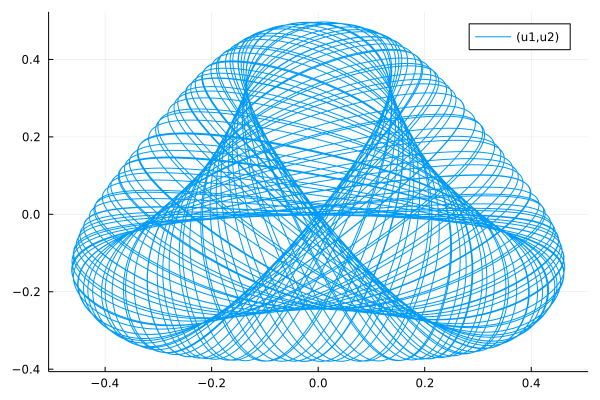

In [97]:
plot(sol_stiff,vars=(1,2))

### Solving Hénon-Heiles Equation with Algorithm of default Solver


In [94]:
sol_default = solve(prob);
@benchmark sol_default = solve(prob)

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  215.500 μs …  20.309 ms  ┊ GC (min … max): 0.00% … 98.29%
 Time  (median):     315.200 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   349.579 μs ± 698.039 μs  ┊ GC (mean ± σ):  8.35% ±  4.16%

  █ ▄       █ ▃▂▂                                                
  ███▄▅▂▂▂▁▂█▆███▇▅▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  216 μs           Histogram: frequency by time          734 μs <

 Memory estimate: 272.62 KiB, allocs estimate: 780.

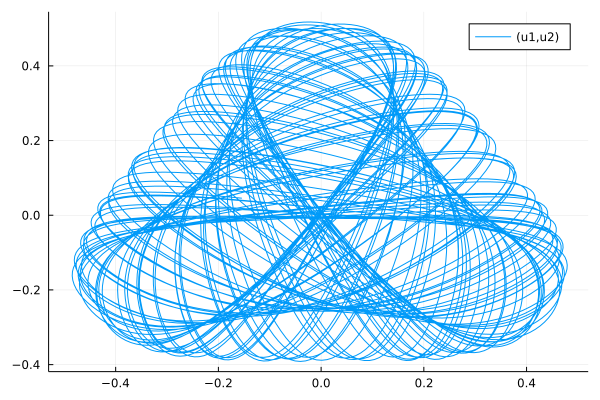

In [95]:
plot(sol_default,vars=(1,2))

# Alternative Way to Define Differential Equations

In [40]:
function henonheilis(u,p,t)     
        dx_dot = u[3]
        dy_dot = u[4]
        dx = -u[1] - 2*u[1]*u[2]
        dy = -u[2] - u[1]^2+u[2]^2
        [dx_dot,dy_dot,dx,dy]
end

henonheilis (generic function with 2 methods)

In [42]:
u0 = [0.2;0.0;0.4;0.0];
tspan = (0.0,500.0);
prob = ODEProblem(henonheilis,u0,tspan)
@btime sol=solve(prob,Tsit5())

  393.200 μs (6454 allocations: 639.52 KiB)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 713-element Vector{Float64}:
   0.0
   0.03517709474199087
   0.11718260062684976
   0.22749676865844815
   0.36857162342482763
   0.5499558221339931
   0.7782980832494255
   1.0638017200153036
   1.4072154031026751
   1.781008851458635
   2.220685661573429
   2.7068725509295426
   3.27436874863287
   ⋮
 492.74994813827357
 493.51076438286816
 494.21033102592867
 494.89948454832944
 495.51440537301625
 496.1400624767563
 496.80400755907374
 497.4761404016147
 498.24737625266243
 498.9167275088623
 499.5755382002253
 500.0
u: 713-element Vector{Vector{Float64}}:
 [0.2, 0.0, 0.4, 0.0]
 [0.21394420718902724, -2.5921734599045545e-5, 0.3927186983525436, -0.001507477445846386]
 [0.2453943902622871, -0.00031896525896387947, 0.3738795030358011, -0.0058329952509834256]
 [0.2850652898443098, -0.0013671269236154747, 0.3446372270892064, -0.013538205707720491]
 [0.33070477966237216, -0.004157106769047696, 0.30136053149473

In [44]:
function henonheilis_static(u,p,t)     
        dx_dot = u[3]
        dy_dot = u[4]
        dx = -u[1] - 2*u[1]*u[2]
        dy = -u[2] - u[1]^2+u[2]^2
        @SVector [dx_dot,dy_dot,dx,dy]
end

henonheilis_static (generic function with 1 method)

In [46]:
u0 = @SVector [0.2;0.0;0.4;0.0];
tspan = (0.0,500.0);
prob = ODEProblem(henonheilis_static,u0,tspan)
@btime sol=solve(prob,Tsit5())

  181.800 μs (740 allocations: 248.78 KiB)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 713-element Vector{Float64}:
   0.0
   0.03517709474199087
   0.11718260062684976
   0.22749676865844815
   0.36857162342482763
   0.5499558221339931
   0.7782980832494255
   1.0638017200153036
   1.4072154031026751
   1.781008851458635
   2.220685661573429
   2.7068725509295426
   3.27436874863287
   ⋮
 492.74994813827357
 493.51076438286816
 494.21033102592867
 494.89948454832944
 495.51440537301625
 496.1400624767563
 496.80400755907374
 497.4761404016147
 498.24737625266243
 498.9167275088623
 499.5755382002253
 500.0
u: 713-element Vector{SVector{4, Float64}}:
 [0.2, 0.0, 0.4, 0.0]
 [0.21394420718902724, -2.5921734599045545e-5, 0.3927186983525436, -0.001507477445846386]
 [0.2453943902622871, -0.00031896525896387947, 0.3738795030358011, -0.0058329952509834256]
 [0.2850652898443098, -0.0013671269236154747, 0.3446372270892064, -0.013538205707720491]
 [0.33070477966237216, -0.004157106769047696, 0.3013605314

# CLOSER LOOK TO THE SYSTEM RESULTS

Equipotential curves of the Hénon–Heiles potential for various values of the energy h. The equipotential curves corresponding to the energy of escape.

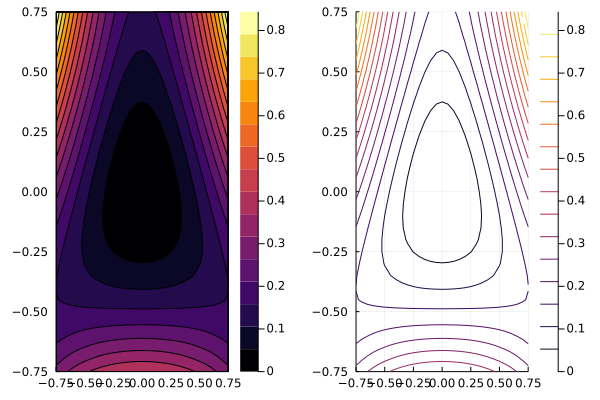

In [50]:
#Plots.pyplot() # back to pyplot
x = -0.75:0.05:0.75
y = -0.75:0.05:0.75
V(x, y) = begin
     0.5*(x^2+y^2)+y*x^2-(y^3)/3
end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(V, X, Y)
p1 = contour(x, y, V, fill=true)
p2 = contour(x, y, Z)
plot(p1, p2)

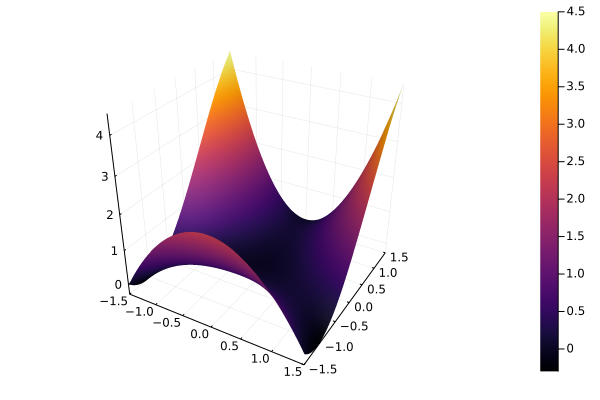

In [98]:
x=-1.5:0.02:1.5
y=-1.5:0.02:1.5
V(x, y) =0.5*(x^2+y^2)+y*x^2-(y^3)/3
surface(x,y,V)

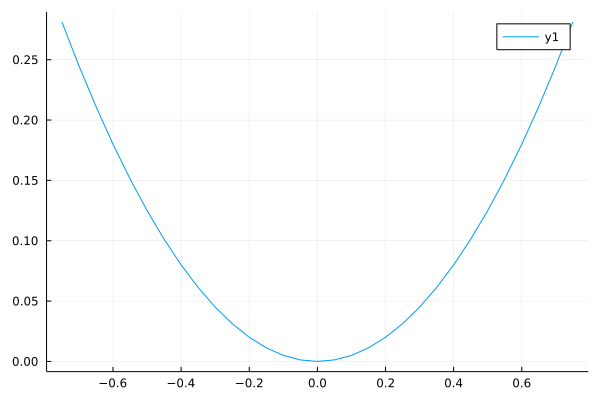

In [54]:
x = Array(-0.75:0.05:0.75)
y= Array(zeros(length(x)))
v=0.5.*(x.^2+y.^2)+y.*x.^2-(y.^3)/3
plot(x,v)

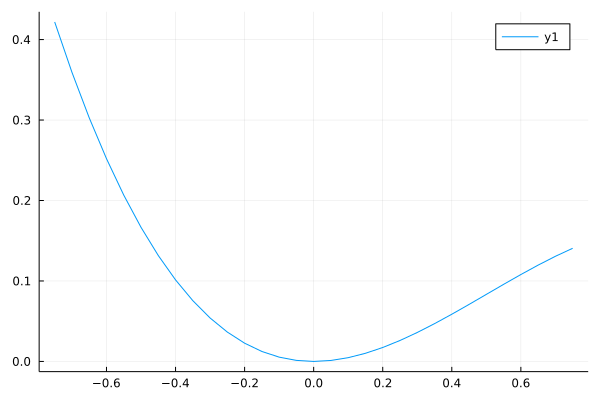

In [56]:
x = Array(zeros(length(x)))
y = Array(-0.75:0.05:0.75)
v=0.5.*(x.^2+y.^2)+y.*x.^2-(y.^3)/3
plot(y,v)